### Uber demand supply Analysis 


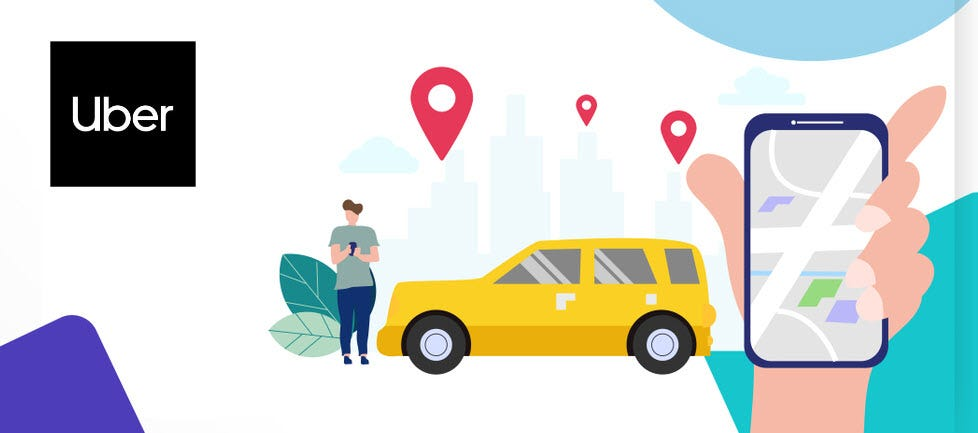

###  Uber Supply Demand Gap| Tools used Tableau & EDA
#### Objective :	Deal with driver cancellation and non-availability of cars leading to loss of potential revenue.
 - The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars to and from the airport) and recommend ways to improve the situation. As a result of the analysis, we should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them for Uber in revenue generation

- Importing Libraries 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime
now = datetime.now()

#### Task 1 :- Identify the data quality issues and clean the data so that you can use it for analysis.

In [4]:
#Loading Dataset , dataset is in csv format.
uber = pd.read_csv('Uber Request Data.csv') 
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [5]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
uber['Driver id'].isnull().value_counts()

Driver id
False    4095
True     2650
Name: count, dtype: int64

In [8]:
uber['Drop timestamp'].isnull().value_counts()

Drop timestamp
True     3914
False    2831
Name: count, dtype: int64

In [9]:
uber=uber.drop(['Driver id'], axis=1)
uber=uber.drop(['Request id'], axis=1)
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp
0,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


 - as we can see that Request timestamp which is related to timeseries data and having diffrent format , so we need to make it in dd mm yyyy format .

In [10]:
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], dayfirst = True,format='mixed')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], dayfirst = True,format='mixed')
# as per the updated pd.to_datetime() previously we didn't need to apply any sort of hyperparameters , 
#but now we required dayfirst = True,format='mixed'
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


#### Task 1.2 Checking for Status col unique values with their particular sum

In [12]:
uber['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [13]:
status_summary = uber.groupby('Status').count()
status_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Cancelled to Trip Completed
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Pickup point       3 non-null      int64
 1   Request timestamp  3 non-null      int64
 2   Drop timestamp     3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


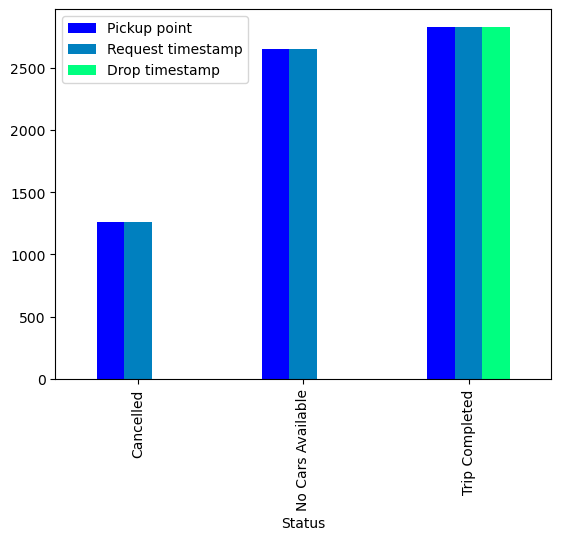

In [14]:
status_summary.plot.bar(colormap = "winter")
plt.show()

In [15]:
uber['Status'].count()

6745

#### Task 1/07/2024 :- plotting graphs and binning time slots into particular hours of the day

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  
1-6 early morning
6-12 morning
12-17 afternoon 
17-20 evening 
20-24 night  
step 1 :- check rows of req_timestmp 
step 2 :- if time matches particular range of slot 


In [16]:
def hr_func(ts):
    return ts.hour

uber['req_hour'] = uber['Request timestamp'].apply(hr_func)


In [17]:
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [18]:
uber.loc[(uber['req_hour'] <= 6) & (uber['req_hour'] > 0 ),'req_timeslot']  = 'Early morning'
uber.loc[(uber['req_hour'] <=12) & (uber['req_hour'] > 6 ),'req_timeslot']  = 'Morning'
uber.loc[(uber['req_hour'] <=17) & (uber['req_hour'] > 12 ),'req_timeslot']  = 'Afternoon'
uber.loc[(uber['req_hour'] <=20) & (uber['req_hour'] > 17 ),'req_timeslot']  = 'Evening'
uber.loc[(uber['req_hour'] <=24) & (uber['req_hour'] > 20 ),'req_timeslot']  = 'Night'




#dividing the trips into 6 sessions based on dt.hour from Request Timestamp

# time_slots=['Late Night','Early Morning','Late Morning','Afternoon','Evening','Night']
# df_uber=df_uber.assign(time_slots=pd.cut(df_uber.Request_timestamp.dt.hour,[-1,4,8,12,16,20,24],labels=time_slots))
# df_uber.head()


In [19]:
uber['req_hour'],uber['req_timeslot'].head(10)


(0       11
 1       17
 2        9
 3       21
 4        8
         ..
 6740    23
 6741    23
 6742    23
 6743    23
 6744    23
 Name: req_hour, Length: 6745, dtype: int64,
 0          Morning
 1        Afternoon
 2          Morning
 3            Night
 4          Morning
 5            Night
 6    Early morning
 7    Early morning
 8        Afternoon
 9    Early morning
 Name: req_timeslot, dtype: object)

In [20]:
uber['req_timeslot'].unique()

array(['Morning', 'Afternoon', 'Night', 'Early morning', 'Evening', nan],
      dtype=object)

In [21]:
uber['req_hour'].unique()

array([11, 17,  9, 21,  8,  6,  5, 12,  4, 14, 22, 10, 18, 15,  2, 13, 16,
       19,  7, 20,  0,  3, 23,  1], dtype=int64)

In [22]:
uber['req_timeslot'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
6740    False
6741    False
6742    False
6743    False
6744    False
Name: req_timeslot, Length: 6745, dtype: bool

In [23]:
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Afternoon
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


In [24]:
uber_bkp=uber.copy()

In [25]:
uber['req_hour']

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: req_hour, Length: 6745, dtype: int64

In [26]:
# part_of_the_day(frequency and availability of cabs from both locations)
# day_of_the_week(check for weekday weekend rush )
# cabs avg duration for trips completed ----- if time permits 


- Suggestion req

In [27]:
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Afternoon
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


In [28]:
# air-city 
# city-air 
# ----- air to city , time duration graph of count no of trips


# time series data 
# axis (time , range/freq)


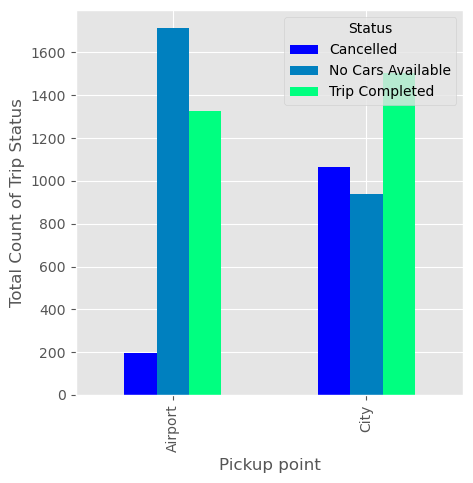

In [29]:
# colors = ["#CC2529", "#8E8D8D","#008000"]
plt.style.use('ggplot')
uber.groupby(['Pickup point','Status']).size().unstack().plot.bar(colormap = "winter",legend = True,figsize = (5,5))
plt.xlabel('Pickup point')
plt.ylabel('Total Count of Trip Status')
plt.show()

- 1. Cancelled :- City cancellations more than airport 
- 2. No Cars available :- City has more cars availble than airport (city is more populated region)
- 3. Trip Completed :- More trips completed from city than airport 

In [30]:
uber.groupby(['Pickup point','Status']).size()

Pickup point  Status           
Airport       Cancelled             198
              No Cars Available    1713
              Trip Completed       1327
City          Cancelled            1066
              No Cars Available     937
              Trip Completed       1504
dtype: int64

- 1. Cancelled :- City cancellations more than airport
    1.1:- City cancellations more happen in the early-Mornings, and Mornings
    1.2:- Cancellations in the evening nad nigh is leeser for both city and airport 
- 2. No Cars available :- City has more cars availble than airport (city is more populated region)
    2.1:- No cars available during evening and night for pickups from airport
    2.2:- City has fewers cars available during mornings and early mornings for airport drop(more cars may available for city runs)
- 3. Trip Completed :- More trips completed from city than airport 
    3.1:- in  mornings 
    3.2:- During nights trip completed are fewers in both cases.
    

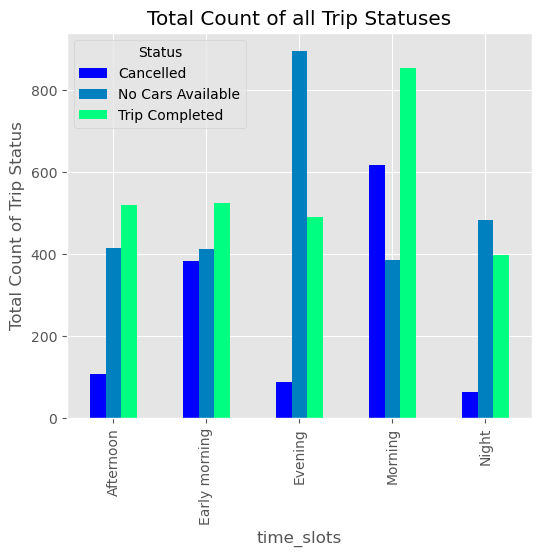

In [31]:
# plotting frequency of all "Trip Status" over the hour of day 
plt.style.use('ggplot')
# colors = ['cool']
uber.groupby(['req_timeslot','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(6,5), colormap="winter")
plt.title('Total Count of all Trip Statuses')
plt.xlabel('time_slots')
plt.ylabel('Total Count of Trip Status')
plt.show()

In [32]:
# Filtering out only "Cancelled"  trips
df_tripscancelled=uber[uber["Status"].str.contains('Cancelled')==True]
df_tripscancelled=df_tripscancelled.reset_index(drop=True)
df_tripscancelled.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot
0,City,Cancelled,2016-07-13 06:08:41,NaT,6,Early morning
1,City,Cancelled,2016-07-14 17:07:58,NaT,17,Afternoon
2,Airport,Cancelled,2016-07-14 20:51:37,NaT,20,Evening
3,City,Cancelled,2016-07-15 10:12:40,NaT,10,Morning
4,Airport,Cancelled,2016-07-12 19:14:00,NaT,19,Evening


In [33]:
# Filtering out only "Trip Completed"  trips
df_tripscompleted=uber[uber["Status"].str.contains('Trip Completed')==True]
df_tripscompleted=df_tripscompleted.reset_index(drop=True)
df_tripscompleted.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Afternoon
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


In [34]:
# Filtering out only "No Cars Available"  trips
df_nocars=uber[uber["Status"].str.contains('No Cars Available')==True]
df_nocars=df_nocars.reset_index(drop=True)
df_nocars.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot
0,City,No Cars Available,2016-07-11 00:02:00,NaT,0,NaN
1,City,No Cars Available,2016-07-11 00:06:00,NaT,0,NaN
2,City,No Cars Available,2016-07-11 00:09:00,NaT,0,NaN
3,Airport,No Cars Available,2016-07-11 00:23:00,NaT,0,NaN
4,Airport,No Cars Available,2016-07-11 00:30:00,NaT,0,NaN


- sns countplot
<!-- # # Grouping by Status and Pickup point. -->
<!-- # uber.groupby(['Status','Pickup point']).size() -->
<!-- # # Visualize Status and Pickup point -->
<!-- # sns.countplot(x=uber['Pickup point'] , hue = uber['Status'] ,data = uber) -->

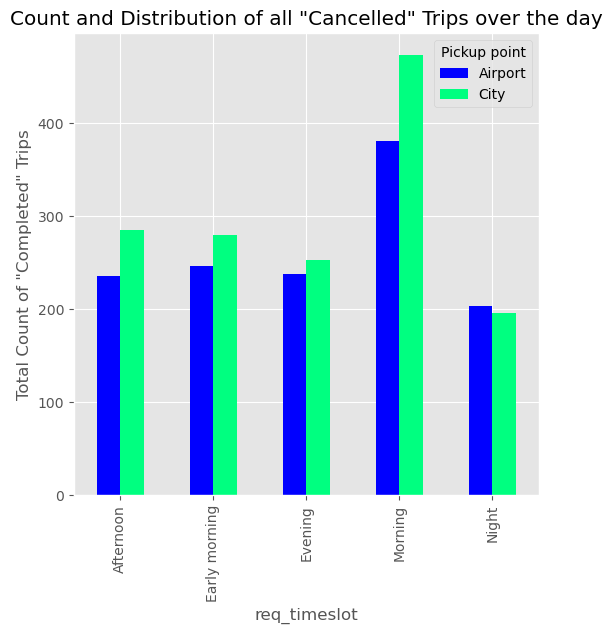

In [35]:
# plotting share/frequency of all Cancelled trips over the day to identify problem areas
plt.style.use('ggplot')
df_tripscompleted.groupby(['req_timeslot','Pickup point']).Status.count().unstack().plot.bar(legend=True, figsize=(6,6), colormap="winter")
plt.title('Count and Distribution of all "Cancelled" Trips over the day')
plt.xlabel('req_timeslot')
plt.ylabel('Total Count of "Completed" Trips')
plt.show()

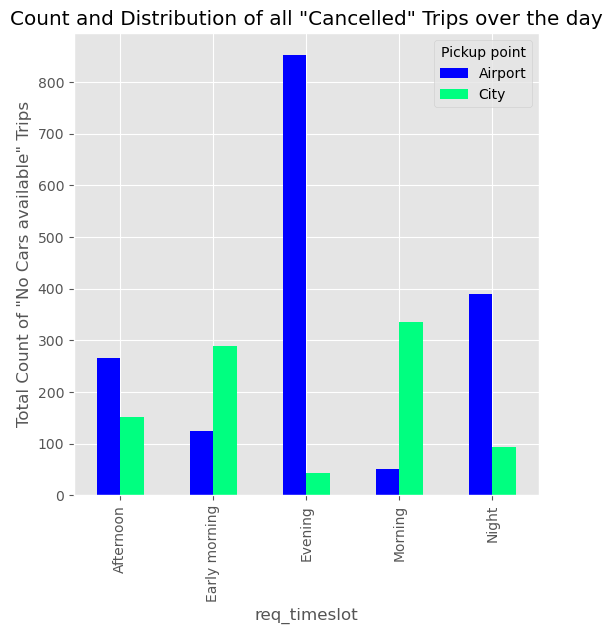

In [36]:
# plotting share/frequency of all Cancelled trips over the day to identify problem areas
plt.style.use('ggplot')
df_nocars.groupby(['req_timeslot','Pickup point']).Status.count().unstack().plot.bar(legend=True, figsize=(6,6), colormap="winter")
plt.title('Count and Distribution of all "Cancelled" Trips over the day')
plt.xlabel('req_timeslot')
plt.ylabel('Total Count of "No Cars available" Trips')
plt.show()

In [37]:
uber['supply_demand'] = ['Supply' if x == 'Trip Completed' else 'Demand' for x in uber['Status']]
uber.tail(10)

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot,supply_demand
6735,Airport,No Cars Available,2016-07-15 23:39:15,NaT,23,Night,Demand
6736,Airport,No Cars Available,2016-07-15 23:42:51,NaT,23,Night,Demand
6737,City,No Cars Available,2016-07-15 23:43:54,NaT,23,Night,Demand
6738,City,No Cars Available,2016-07-15 23:46:03,NaT,23,Night,Demand
6739,City,No Cars Available,2016-07-15 23:46:20,NaT,23,Night,Demand
6740,City,No Cars Available,2016-07-15 23:49:03,NaT,23,Night,Demand
6741,Airport,No Cars Available,2016-07-15 23:50:05,NaT,23,Night,Demand
6742,City,No Cars Available,2016-07-15 23:52:06,NaT,23,Night,Demand
6743,City,No Cars Available,2016-07-15 23:54:39,NaT,23,Night,Demand
6744,Airport,No Cars Available,2016-07-15 23:55:03,NaT,23,Night,Demand


In [38]:
uber['supply_demand'].value_counts()

supply_demand
Demand    3914
Supply    2831
Name: count, dtype: int64

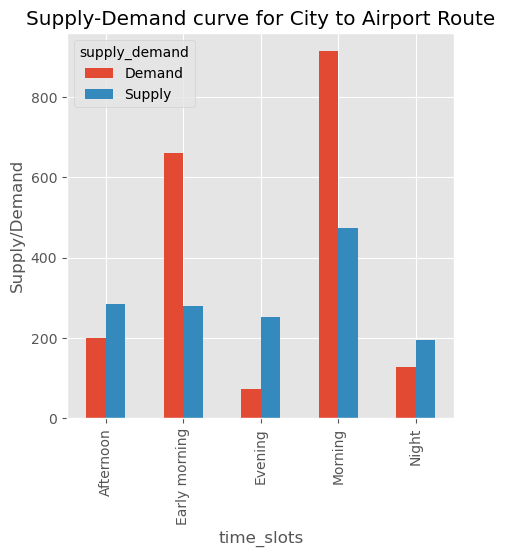

In [39]:
#Plotting Supply and Demand on the City to Airport Route
df_citytoairport_supplydemand=uber[uber['Pickup point'].str.contains('City')==True]
plt.style.use('ggplot')
df_citytoairport_supplydemand.groupby(['req_timeslot','supply_demand']).supply_demand.count().unstack().plot.bar(legend=True, figsize=(5,5))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('time_slots')
plt.ylabel('Supply/Demand')
plt.show()

- Cancelled :- City cancellations more than airport 1.1:- City cancellations more happen in the early-Mornings, and Mornings 1.2:- Cancellations in the evening nad nigh is leeser for both city and airport
No Cars available :- City has more cars availble than airport (city is more populated region) 2.1:- No cars available during evening and night for pickups from airport 2.2:- City has fewers cars available during mornings and early mornings for airport drop(more cars may available for city runs)
Trip Completed :- More trips completed from city than airport 3.1:- in mornings 3.2:- During nights trip completed are fewers in both cases.m

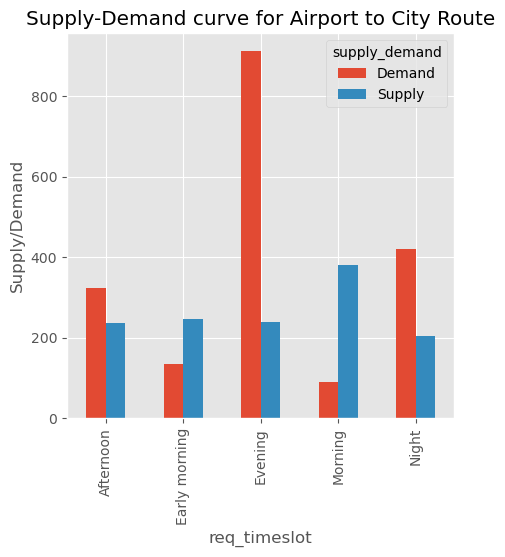

In [40]:
#Plotting Supply and Demand on the Airport to City route
df_airporttocity_supplydemand=uber[uber['Pickup point'].str.contains('Airport')==True]
plt.style.use('ggplot')
df_airporttocity_supplydemand.groupby(['req_timeslot','supply_demand']).supply_demand.count().unstack().plot.bar(legend=True, figsize=(5,5))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('req_timeslot')
plt.ylabel('Supply/Demand')
plt.show()

- Date ,Day ,Year` function task 

In [41]:
def hr_func(ts):
    return ts.day

uber['req_day'] = uber['Request timestamp'].apply(hr_func)


In [42]:
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot,supply_demand,req_day
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,Supply,11
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Afternoon,Supply,11
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,Supply,12
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,Supply,12
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,Supply,13


In [43]:
def hr_func(ts):
    return ts.month

uber['req_month'] = uber['Request timestamp'].apply(hr_func)


In [44]:
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot,supply_demand,req_day,req_month
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,Supply,11,7
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Afternoon,Supply,11,7
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,Supply,12,7
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,Supply,12,7
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,Supply,13,7


In [45]:
def hr_func(ts):
    return ts.year

uber['req_year'] = uber['Request timestamp'].apply(hr_func)


In [46]:
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot,supply_demand,req_day,req_month,req_year
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,Supply,11,7,2016
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Afternoon,Supply,11,7,2016
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,Supply,12,7,2016
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,Supply,12,7,2016
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,Supply,13,7,2016


In [47]:
def hr_func(ts):
    return ts.min

uber['req_min'] = uber['Request timestamp'].apply(hr_func)


In [48]:
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot,supply_demand,req_day,req_month,req_year,req_min
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,Supply,11,7,2016,1677-09-21 00:12:43.145224193
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Afternoon,Supply,11,7,2016,1677-09-21 00:12:43.145224193
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,Supply,12,7,2016,1677-09-21 00:12:43.145224193
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,Supply,12,7,2016,1677-09-21 00:12:43.145224193
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,Supply,13,7,2016,1677-09-21 00:12:43.145224193


In [49]:
# uber['Day'] = uber['Request timestamp'].apply(lambda x: datetime.datetime.strftime(x, '%A'))

In [50]:
def hr_func(ts):
    return ts.strftime('%A')

uber['weekdays'] = uber['Request timestamp'].apply(hr_func)


In [51]:
uber.head()

,Pickup point,Status,Request timestamp,Drop timestamp,req_hour,req_timeslot,supply_demand,req_day,req_month,req_year,req_min,weekdays
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,Supply,11,7,2016,1677-09-21 00:12:43.145224193,Monday
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Afternoon,Supply,11,7,2016,1677-09-21 00:12:43.145224193,Monday
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,Supply,12,7,2016,1677-09-21 00:12:43.145224193,Tuesday
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,Supply,12,7,2016,1677-09-21 00:12:43.145224193,Tuesday
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,Supply,13,7,2016,1677-09-21 00:12:43.145224193,Wednesday


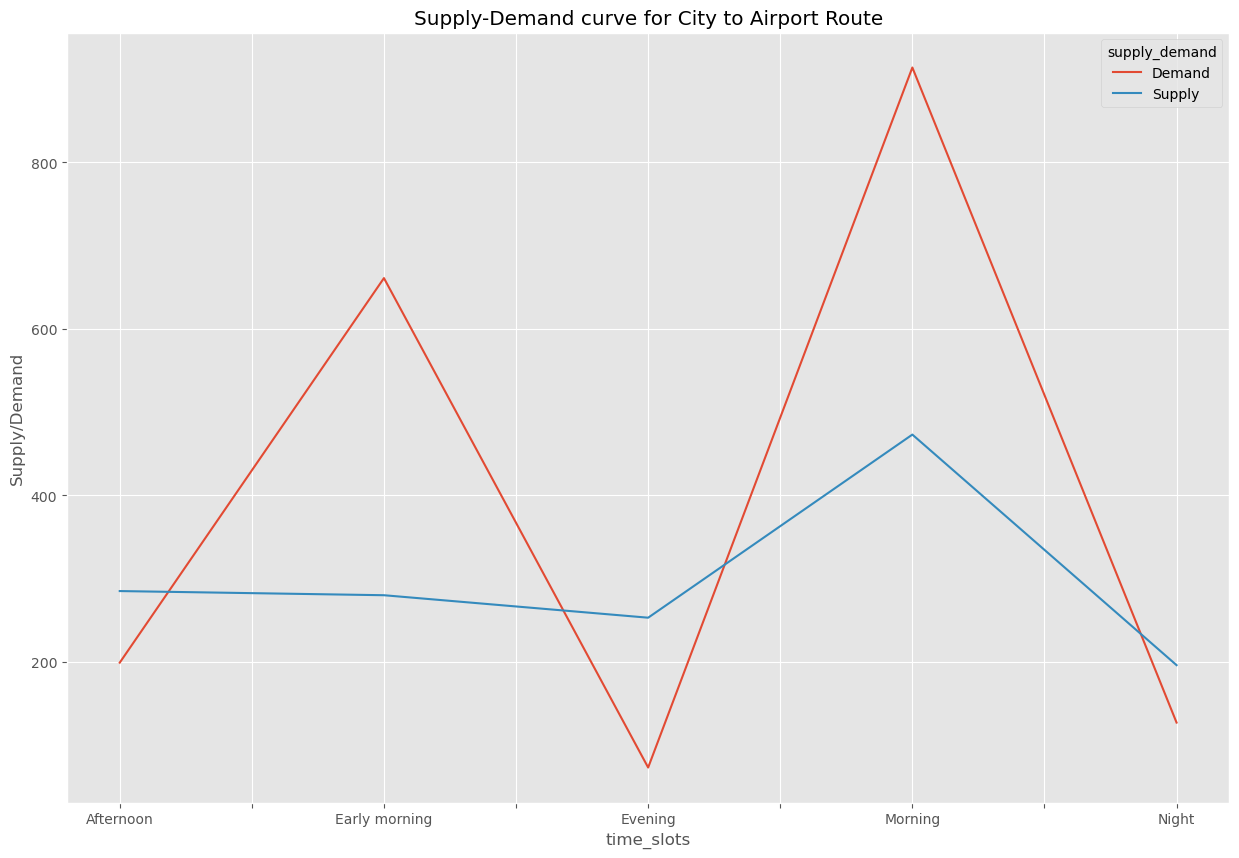

In [55]:
#Plotting Supply and Demand on the City to Airport Route
uber_citytoairport_supplydemand=uber[uber["Pickup point"].str.contains('City')==True]
plt.style.use('ggplot')
uber_citytoairport_supplydemand.groupby(['req_timeslot','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('time_slots')
plt.ylabel('Supply/Demand')
plt.show()

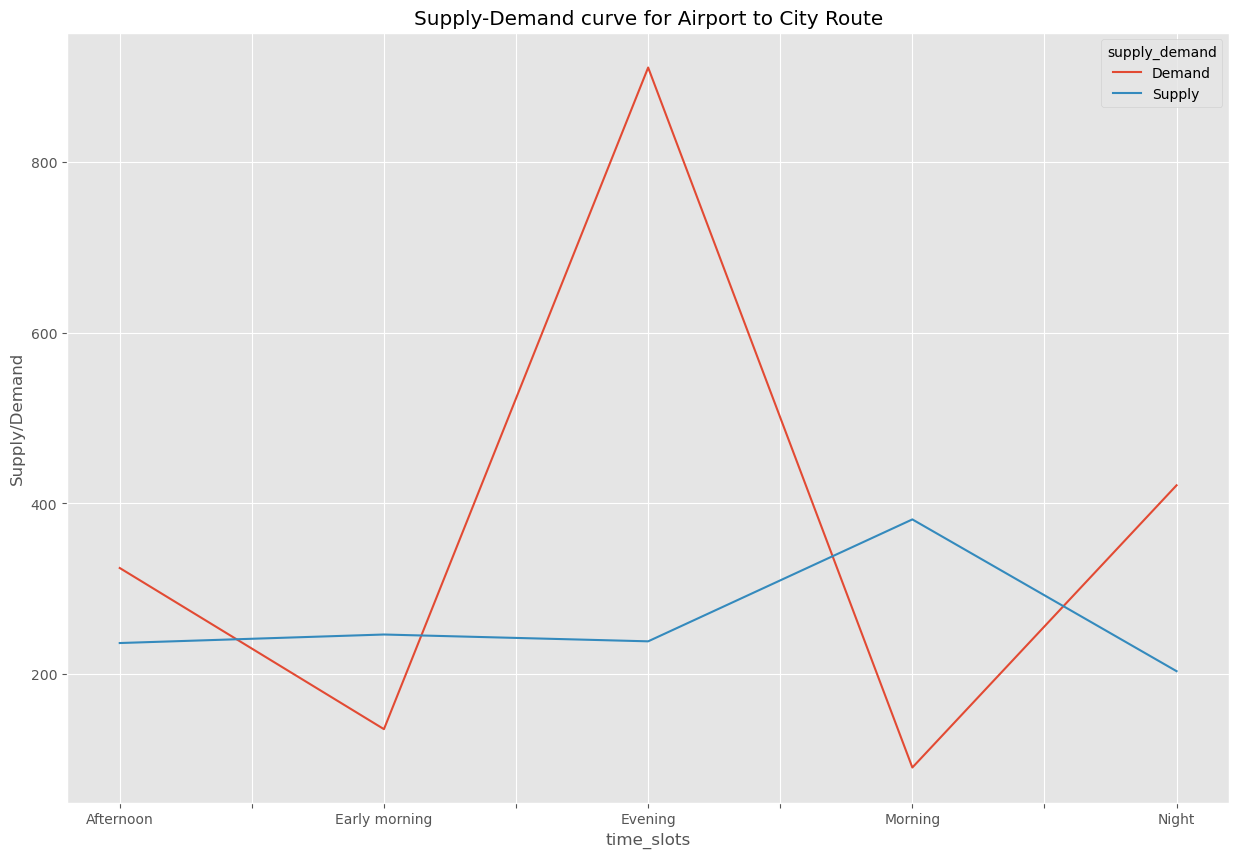

In [56]:
#Plotting Supply and Demand on the Airport to City route
uber_airporttocity_supplydemand=uber[uber["Pickup point"].str.contains('Airport')==True]
plt.style.use('ggplot')
uber_airporttocity_supplydemand.groupby(['req_timeslot','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('time_slots')
plt.ylabel('Supply/Demand')
plt.show()

 - We observe that the Demand is very high in the evening in the Airport to City route but the supply is very low
Correlating these two plots, a possible hypothesis could be:

1.The demand during morning and afternoon hours from the Airport to City is quite low, which means that a driver who completed a City to Airport route in the morning hours may have to wait a really long time to get a ride back to the City, or he may have to come back without a passenger. Both situations are not idle for drivers, which might be the reason for highest number of "Cancelled" trips in the City to Airport trip in the morning hours

2.The vice versa happens in evening when there are too many flight coming in to the airport and hence there is a high demand for cabs and not enough supply. which is why most number of "No Cars Available" were observed in Evening in the Airport to City route.

​